- Good Coding Practice with Jupyter Notebook
- Presented by : Providence Adu

### Import Libraries

- Pandas is imported as **pd** because we don't want to type the full name _'Pandas'_ when we are calling its functions. Same apply to numpy as **np**, seaborn as **sns** and matplotlib.pyplot as **plt**
- **os** allows you to modify your working directory (path where you want your data save or call your data from)




In [1]:
import pandas as pd
import numpy as np
import os
import arcpy
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb

### Set Your Working Directory

- Identify folders where your data is saved  
- Copy the path 
- Change working directory to this path
- Preview files in your directory using glob

In [2]:
# print work directory using pwd

In [21]:
pwd

'C:\\Users\\padu\\Desktop\\JupyterNotebook'

In [4]:
workdir = 'C:\\Users\\padu\\Desktop\\JupyterNotebook'
os.chdir(workdir)

In [5]:
pwd

'C:\\Users\\padu\\Desktop\\JupyterNotebook'

In [6]:
# preview files
files = gb.glob(workdir +"/*.csv")
files

['C:\\Users\\padu\\Desktop\\JupyterNotebook\\Davidson.csv',
 'C:\\Users\\padu\\Desktop\\JupyterNotebook\\economistdata.csv',
 'C:\\Users\\padu\\Desktop\\JupyterNotebook\\NCBelowPovertyLine.csv',
 'C:\\Users\\padu\\Desktop\\JupyterNotebook\\USCities.csv']

### Read Data Using Pandas
- Read Davidson data 
- Review columns 
- compute percent black
- sort data descending order

In [7]:
# Read Davidson Data
DavidsonPop = pd.read_csv('Davidson.csv')
DavidsonPop

,objectid,total,white,black,hispanic
0,1337,0,0,0,0
1,1954,0,0,0,0
2,1686,0,0,0,0
3,1511,0,0,0,0
4,1561,0,0,0,0
...,...,...,...,...,...
306,13814,432,389,23,16
307,8637,474,467,1,7
308,6842,492,403,45,27
309,6414,540,439,43,28


In [8]:
# Preview columns
DavidsonPop.columns

Index(['objectid', 'total', 'white', 'black', 'hispanic'], dtype='object')

In [9]:
# Compute percent black

DavidsonPop['PercentBlack'] = (DavidsonPop['black']/DavidsonPop['total'])*100
DavidsonPop

,objectid,total,white,black,hispanic,PercentBlack
0,1337,0,0,0,0,NaN
1,1954,0,0,0,0,NaN
2,1686,0,0,0,0,NaN
3,1511,0,0,0,0,NaN
4,1561,0,0,0,0,NaN
...,...,...,...,...,...,...
306,13814,432,389,23,16,5.324074
307,8637,474,467,1,7,0.210970
308,6842,492,403,45,27,9.146341
309,6414,540,439,43,28,7.962963


In [10]:
## sort dataframe 
DavidsonPop.sort_values('PercentBlack', ascending=False)

,objectid,total,white,black,hispanic,PercentBlack
110,2192,1,0,1,0,100.000000
253,9778,46,3,43,1,93.478261
166,2057,13,1,12,0,92.307692
258,11029,56,13,43,11,76.785714
282,9468,96,18,73,5,76.041667
...,...,...,...,...,...,...
104,12108,0,0,0,0,NaN
105,12103,0,0,0,0,NaN
106,12102,0,0,0,0,NaN
107,12107,0,0,0,0,NaN


### Create Your own Data
- create a python dictionary for big cities and their population
- create a pandas dataframe from the dictionary
- export the pandas dataframe as a csv


In [11]:
# dictionary of cities and their population

Cities = {'State': ['New York', 'California', 'Atlanta', 'Boston'],
        'FID': [4, 3, 2, 5],
        'Population2010' : [100 ,80, 60, 30],
        'Population2015' : [120 ,86, 69, 37],
        'Population2020' : [150 ,90, 72, 42]
       }

# create dataframe from the dictionary

BigCities = pd.DataFrame(Cities)

BigCities

,State,FID,Population2010,Population2015,Population2020
0,New York,4,100,120,150
1,California,3,80,86,90
2,Atlanta,2,60,69,72
3,Boston,5,30,37,42


In [12]:
#export data as csv

BigCities.to_csv('USCities.csv',index = False)

In [13]:
pwd

'C:\\Users\\padu\\Desktop\\JupyterNotebook'

### Visualizing Your Data

- create correlation 
- visualize histogram 
- create box plot
- create scatter plot

#### Read North Carolina

In [14]:
NCPoverty = pd.read_csv('NCBelowPovertyLine.csv')
NCPoverty.columns

Index(['GEOID', 'NAME', 'BelowPovertyE', 'BelowPovertyM', 'TotalPovertyE',
       'TotalPovertyM'],
      dtype='object')

##### Correlation

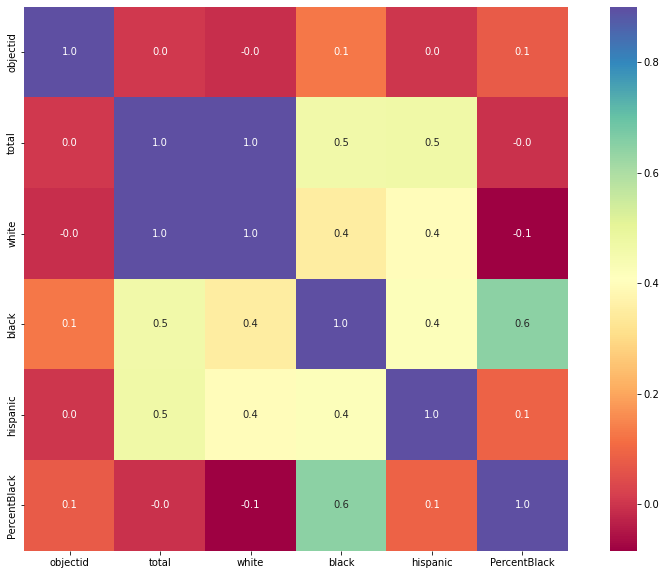

In [15]:
# call the correlation matrix function 
cormatrix = DavidsonPop.corr()

# set the figure size 
f, ax = plt.subplots(figsize=(15, 10))

# Create heat map using seaborn library

sns.heatmap(cormatrix, vmax=0.9, square=True,fmt= '.1f',annot_kws={'size': 10}, 
            annot= True, cmap="Spectral")

# show your heatmap using matplotlib

plt.show();

#### Histogram

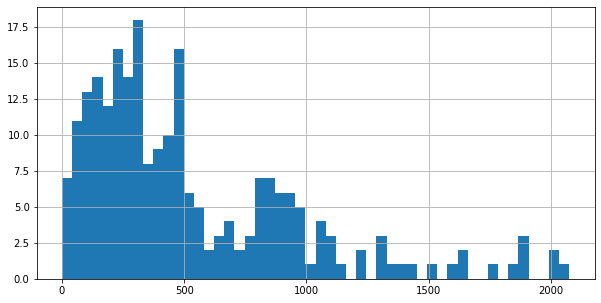

In [16]:
NCPoverty['BelowPovertyE'].hist(bins = 50, figsize= (10,5))
plt.show();

### Scatter Plot

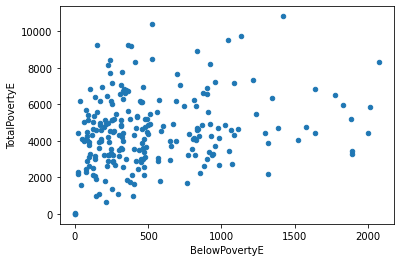

In [17]:
NCPoverty.plot.scatter(x='BelowPovertyE', y='TotalPovertyE')
plt.show();

#### Box Plot

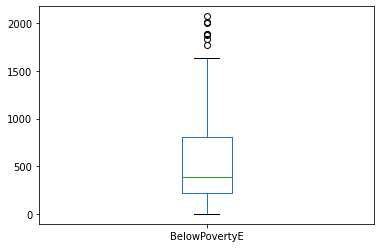

In [18]:
NCPoverty['BelowPovertyE'].plot.box()
plt.show()

### Key Differences Python and R

<img src = 'https://lh6.googleusercontent.com/uXeA34PA0WC--o0V09ik9OdQBqFl_W6HTUm_EGp2F6ZUwUxtTyKXZletNCxiYVYPl0JeANw-eECaAVVGHS7ao8D2BpyEK1CPQhsda3HmKZKu6ZMrsOOTWGwc_SfiwhfgGo5OlH6Y' width=800 height = 300/>

## Average Python Programmer Salary By State


 <img src = 'https://www.springboard.com/blog/wp-content/uploads/2021/05/Screenshot-2021-05-28-at-8.10.43-PM.png' width=800 height = 300>